<a href="https://colab.research.google.com/github/ghazaletlbn/my-bachelor-project/blob/main/Bachelor_project_part_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import random
import scipy.sparse as sp
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from scipy.sparse.linalg import eigsh
from scipy.stats import pareto, expon, uniform, weibull_min
import math

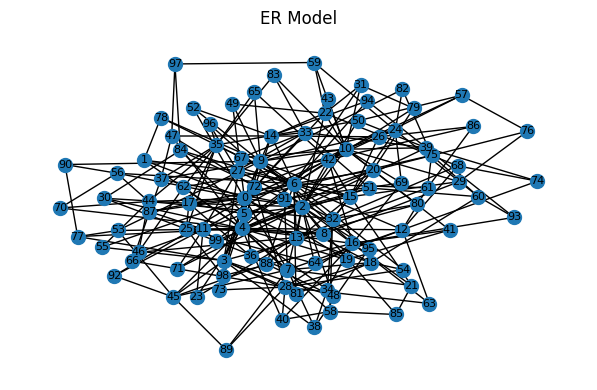

<ipython-input-4-539325644b70>:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


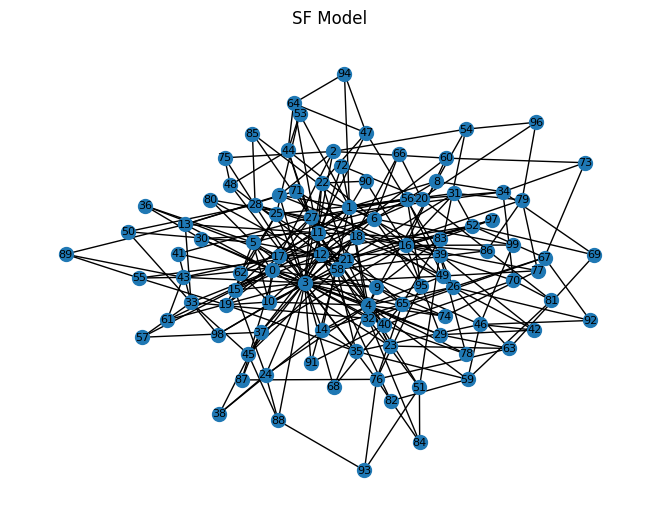

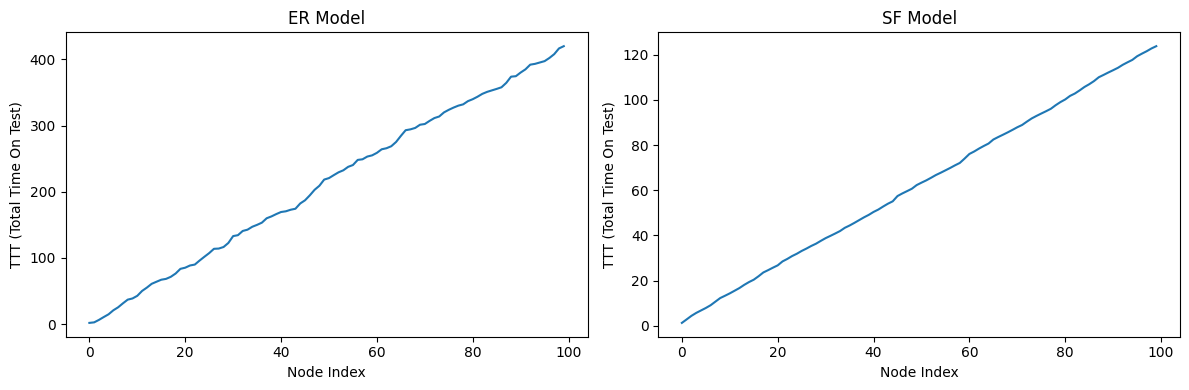

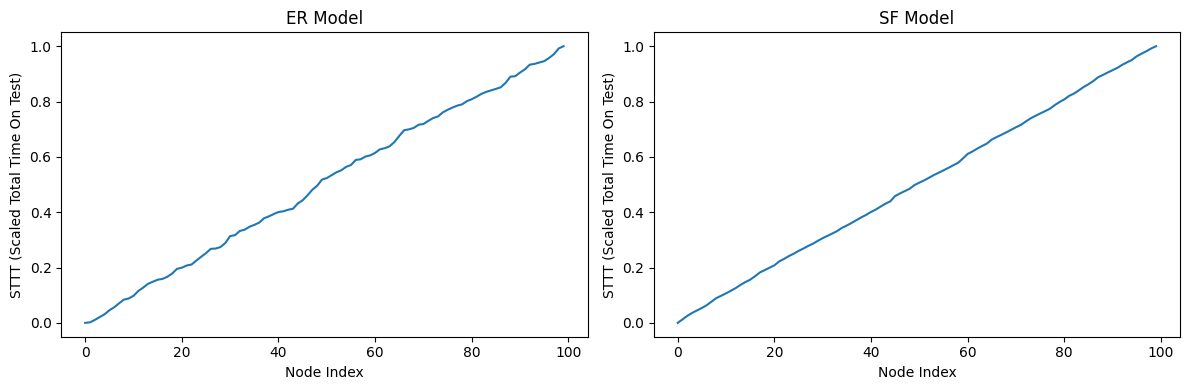

In [ ]:
from scipy.stats import weibull_min, pareto, expon

# Set the seed for reproducibility
np.random.seed(42)

# Function to generate age values based on the desired distribution
def generate_ages(distribution, size):
    if distribution == 'weibull':
        return weibull_min.rvs(2, scale=5, size=size)
    elif distribution == 'pareto':
        return pareto.rvs(5, size=size)
    elif distribution == 'exponential':
        return expon.rvs(scale=5, size=size)
    else:
        raise ValueError('Invalid distribution type')

# Function to simulate the graph and node ages
def simulate_graph(n, m, distribution):
    if distribution not in ['weibull', 'pareto', 'exponential']:
        raise ValueError('Invalid distribution type')
    elif distribution == 'exponential':
        G = nx.gnm_random_graph(n, m)
    else:
        G = nx.barabasi_albert_graph(n, m)

    # Generate node ages based on the desired distribution
    ages = generate_ages(distribution, n)

    return G, ages

# Simulate the ER graph and node ages
n_er = 100  # Number of nodes
m_er = 3    # Number of edges to attach from a new node to existing nodes
G_er, ages_er = simulate_graph(n_er, m_er, 'weibull')

# Simulate the SF graph and node ages
n_sf = 100  # Number of nodes
m_sf = 3    # Number of edges to attach from a new node to existing nodes
G_sf, ages_sf = simulate_graph(n_sf, m_sf, 'pareto')

# Calculate TTT (Total Time On Test) conversions for the ER graph
ttt_er = np.cumsum(np.flip(ages_er))

# Calculate TTT (Total Time On Test) conversions for the SF graph
ttt_sf = np.cumsum(np.flip(ages_sf))

sttt_er = (ttt_er - np.min(ttt_er)) / (np.max(ttt_er) - np.min(ttt_er))
sttt_sf = (ttt_sf - np.min(ttt_sf)) / (np.max(ttt_sf) - np.min(ttt_sf))



# Plotting the ER graph
plt.figure(figsize=(12, 4))
plt.subplot(121)
nx.draw(G_er, with_labels=True, node_size=100, font_size=8)
plt.title('ER Model')
plt.tight_layout()
plt.show()




# Plotting the SF graph
nx.draw(G_sf, with_labels=True, node_size=100, font_size=8)
plt.title('SF Model')

plt.tight_layout()
plt.show()



# Plotting the TTT (Total Time On Test) conversions for the ER graph
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(ttt_er)
plt.xlabel('Node Index')
plt.ylabel('TTT (Total Time On Test)')
plt.title('ER Model')

# Plotting the TTT (Total Time On Test) conversions for the SF graph
plt.subplot(122)
plt.plot(ttt_sf)
plt.xlabel('Node Index')
plt.ylabel('TTT (Total Time On Test)')
plt.title('SF Model')

plt.tight_layout()
plt.show()

# Plotting the STTT (Scaled Total Time On Test) conversions for the ER graph
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(sttt_er)
plt.xlabel('Node Index')
plt.ylabel('STTT (Scaled Total Time On Test)')
plt.title('ER Model')

# Plotting the STTT (Scaled Total Time On Test) conversions for the SF graph
plt.subplot(122)
plt.plot(sttt_sf)
plt.xlabel('Node Index')
plt.ylabel('STTT (Scaled Total Time On Test)')
plt.title('SF Model')

plt.tight_layout()
plt.show()






